In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from joblib import dump
from preprocess import prep_data
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [2]:
fish_data = pd.read_csv("fish_participant.csv").assign(Species=lambda df: df["Species"].replace({
    "Perch":1,
    "Bream":2,
    "Roach":3,
    "Pike":4,
    "Smelt":5,
    "Parkki":6,
    "Whitefish":7
}))

print(fish_data.head)
print(fish_data.dtypes)

<bound method NDFrame.head of      Species  Weight  Length1  Length2  Length3   Height   Width
0          2   430.0     26.5     29.0     34.0  12.4440  5.1340
1          1   110.0     20.0     22.0     23.5   5.5225  3.9950
2          3   160.0     20.5     22.5     25.3   7.0334  3.8203
3          6    60.0     14.3     15.5     17.4   6.5772  2.3142
4          2   700.0     30.4     33.0     38.3  14.8604  5.2854
..       ...     ...      ...      ...      ...      ...     ...
106        1   197.0     23.5     25.6     27.0   6.5610  4.2390
107        6   140.0     19.0     20.7     23.2   8.5376  3.2944
108        3   110.0     19.1     20.8     23.1   6.1677  3.3957
109        1   685.0     34.0     36.5     39.0  10.8810  6.8640
110        1   300.0     26.9     28.7     30.1   7.5852  4.6354

[111 rows x 7 columns]>
Species      int64
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


In [3]:
fish_data_holdout = pd.read_csv("fish_holdout_demo.csv").assign(Species=lambda df: df["Species"].replace({
    "Perch":1,
    "Bream":2,
    "Roach":3,
    "Pike":4,
    "Smelt":5,
    "Parkki":6,
    "Whitefish":7
}))
fish_data = fish_data.append(fish_data_holdout, ignore_index = True)

print(fish_data.head)
print(fish_data.dtypes)

<bound method NDFrame.head of      Species  Weight  Length1  Length2  Length3   Height   Width
0          2   430.0     26.5     29.0     34.0  12.4440  5.1340
1          1   110.0     20.0     22.0     23.5   5.5225  3.9950
2          3   160.0     20.5     22.5     25.3   7.0334  3.8203
3          6    60.0     14.3     15.5     17.4   6.5772  2.3142
4          2   700.0     30.4     33.0     38.3  14.8604  5.2854
..       ...     ...      ...      ...      ...      ...     ...
134        1  1000.0     39.8     43.0     45.2  11.9328  7.2772
135        2   720.0     32.0     35.0     40.6  16.3618  6.0900
136        1  1100.0     39.0     42.0     44.6  12.8002  6.8684
137        1   100.0     16.2     18.0     19.2   5.2224  3.3216
138        3   160.0     21.1     22.5     25.0   6.4000  3.8000

[139 rows x 7 columns]>
Species      int64
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


In [4]:
fish_data_holdout = pd.read_csv("fish_holdout_demo.csv").assign(Species=lambda df: df["Species"].replace({
    "Perch":1,
    "Bream":2,
    "Roach":3,
    "Pike":4,
    "Smelt":5,
    "Parkki":6,
    "Whitefish":7
}))
fish_data = fish_data.append(fish_data_holdout, ignore_index = True)

print(fish_data.head)
print(fish_data.dtypes)

<bound method NDFrame.head of      Species  Weight  Length1  Length2  Length3   Height   Width
0          2   430.0     26.5     29.0     34.0  12.4440  5.1340
1          1   110.0     20.0     22.0     23.5   5.5225  3.9950
2          3   160.0     20.5     22.5     25.3   7.0334  3.8203
3          6    60.0     14.3     15.5     17.4   6.5772  2.3142
4          2   700.0     30.4     33.0     38.3  14.8604  5.2854
..       ...     ...      ...      ...      ...      ...     ...
162        1  1000.0     39.8     43.0     45.2  11.9328  7.2772
163        2   720.0     32.0     35.0     40.6  16.3618  6.0900
164        1  1100.0     39.0     42.0     44.6  12.8002  6.8684
165        1   100.0     16.2     18.0     19.2   5.2224  3.3216
166        3   160.0     21.1     22.5     25.0   6.4000  3.8000

[167 rows x 7 columns]>
Species      int64
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


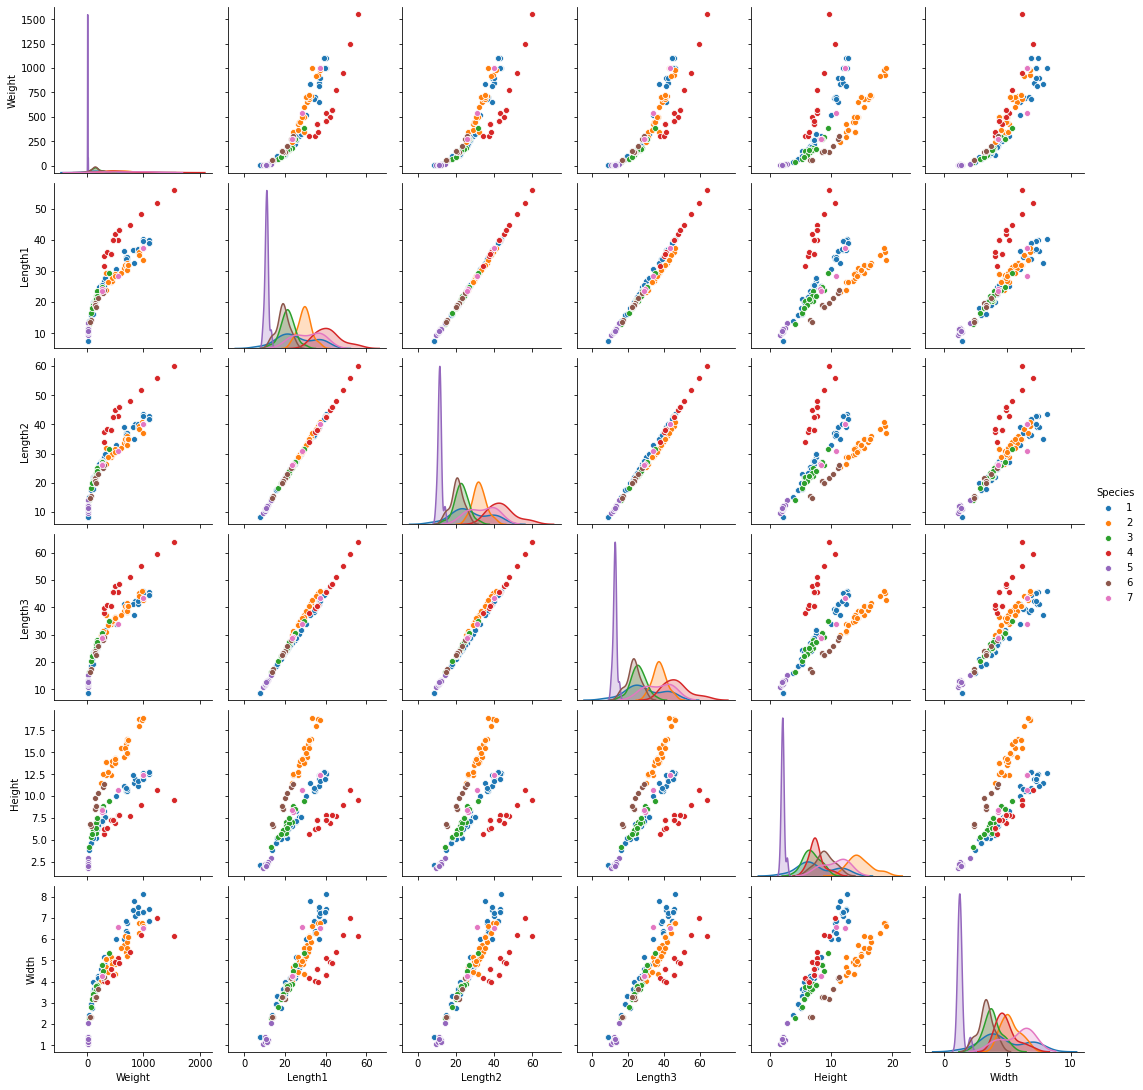

In [5]:
sns.pairplot(fish_data, kind='scatter', hue='Species')

In [6]:
fish_data = pd.read_csv("fish_participant.csv")

Linear Regression

In [7]:
y=fish_data["Weight"].values

X= pd.get_dummies(
    fish_data[[column for column in fish_data.columns if (column != "Weight") ]], drop_first = True
).values
lm=LinearRegression()

In [8]:
cross_validate(lm, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-10593.094392257557

In [9]:
df_holdout = pd.read_csv("fish_holdout_demo.csv")
y_true=df_holdout["Weight"].values

X_holdout= pd.get_dummies(
    df_holdout[[column for column in df_holdout.columns if (column != "Weight") ]], drop_first = True
).values

In [10]:
lm.fit(X,y)
y_holdout = lm.predict(X_holdout)

In [11]:
print(y_holdout)
print(y_true)
ho_mse = mean_squared_error(y_true, y_holdout)
print(ho_mse)

[ 156.0208366   134.91029739   19.10338299  423.19799966  545.23014341
  239.62370558  672.07689787   -5.92706377  543.16668901  435.61085219
  503.24673784  253.9560618   345.05986979  -19.20424444  436.66414066
  494.17850413 -386.3968948   597.02398346  131.66238157   49.61529386
  357.44149209  840.99925667  208.42824217  967.01387985  715.68963478
  938.50029072   21.16802245  133.02630695]
[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]
12093.222165553118


In [12]:
lr_scaled = make_pipeline(StandardScaler(),
                         LinearRegression())

In [13]:
cross_validate(lr_scaled, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-10593.094392257608

In [14]:
df_holdout = pd.read_csv("fish_holdout_demo.csv")
y_true=df_holdout["Weight"].values

X_holdout= pd.get_dummies(
    df_holdout[[column for column in df_holdout.columns if (column != "Weight") ]], drop_first = True
).values

In [15]:
lr_scaled.fit(X,y)
y_holdout = lr_scaled.predict(X_holdout)

In [16]:
print(y_holdout)
print(y_true)
ho_mse = mean_squared_error(y_true, y_holdout)
print(ho_mse)

[ 156.0208366   134.91029739   19.10338299  423.19799966  545.23014341
  239.62370558  672.07689787   -5.92706377  543.16668901  435.61085219
  503.24673784  253.9560618   345.05986979  -19.20424444  436.66414066
  494.17850413 -386.3968948   597.02398346  131.66238157   49.61529386
  357.44149209  840.99925667  208.42824217  967.01387985  715.68963478
  938.50029072   21.16802245  133.02630695]
[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]
12093.22216555305


In [17]:
decisiontree = DecisionTreeRegressor()

In [18]:
cross_validate(decisiontree, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-6444.6029169960475

In [19]:
df_holdout = pd.read_csv("fish_holdout_demo.csv")
y_true=df_holdout["Weight"].values

X_holdout= pd.get_dummies(
    df_holdout[[column for column in df_holdout.columns if (column != "Weight") ]], drop_first = True
).values

In [20]:
decisiontree.fit(X,y)
dump(decisiontree, 'decisiontree.joblib') 
y_holdout = decisiontree.predict(X_holdout)

In [21]:
print(y_holdout)
print(y_true)
ho_mse = mean_squared_error(y_true, y_holdout)
print(ho_mse)

[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]
[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]
0.0


In [22]:
fish_data = pd.read_csv("fish_participant.csv")
df_holdout = pd.read_csv("fish_holdout_demo.csv")
fish_data = fish_data.append(df_holdout, ignore_index = True)
y=fish_data["Weight"].values

X= pd.get_dummies(
    fish_data[[column for column in fish_data.columns if (column != "Weight") ]], drop_first = True
).values

In [23]:
decisiontree = DecisionTreeRegressor()
decisiontree.fit(X,y)
cross_validate(decisiontree, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-5254.753169312168

In [26]:
dump(decisiontree, 'decisiontree.joblib') 
y_holdout = decisiontree.predict(X_holdout)

In [27]:
print(y_holdout)
print(y_true)
ho_mse = mean_squared_error(y_true, y_holdout)
print(ho_mse)

[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]
[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]
0.0


In [28]:
dt_scaled = make_pipeline(StandardScaler(),
                         DecisionTreeRegressor())

In [29]:
cross_validate(dt_scaled, X,y, scoring =["neg_mean_squared_error", "neg_mean_absolute_error", "neg_median_absolute_error"],
              cv=KFold(random_state=123, shuffle=True))

{'fit_time': array([0.00149941, 0.00150156, 0.00199962, 0.00099969, 0.00099754]),
 'score_time': array([0.00211573, 0.00050044, 0.00049877, 0.00049996, 0.00049973]),
 'test_neg_mean_squared_error': array([ -5410.83321429,  -3157.21428571, -13464.86821429,  -5645.52      ,
         -1775.73      ]),
 'test_neg_mean_absolute_error': array([-27.63214286, -28.5       , -61.94642857, -32.58571429,
        -18.5       ]),
 'test_neg_median_absolute_error': array([ -0.05,  -2.5 , -16.  ,  -1.7 ,  -0.  ])}